<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Clusterizaci%C3%B3n_DBSCAN_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DBSCAN (Core)**
**Descripción:**

En esta actividad, implementarás el algoritmo DBSCAN para detectar patrones de agrupamiento y encontrar clientes atípicos en el dataset «Wholesale Customers Data» disponible en Kaggle. DBSCAN es ideal para detectar clusters de forma arbitraria y encontrar puntos atípicos (outliers), lo que es útil en escenarios donde los datos no forman clusters esféricos como en el caso de K-means. Se reemplaza el Dataset por otro.

Enlace al dataset: https://archive.ics.uci.edu/dataset/45/heart+disease


**Objetivo:**

El objetivo principal de esta actividad es aplicar el algoritmo DBSCAN para identificar clusters y clientes atípicos en el dataset. El enfoque está en comprender cómo DBSCAN maneja los outliers y su capacidad para detectar agrupamientos densos.

**Instrucciones:**

1. Carga de datos:

  – Descarga y carga el dataset de Kaggle. Realiza una exploración inicial del dataset, identificando las variables que consideras importantes para el agrupamiento.

  – El dataset contiene información sobre diferentes tipos de clientes y su comportamiento de compra, lo que incluye variables como el gasto anual en distintas categorías de productos.

2. Exploración y preprocesamiento de datos:

  – Realiza un análisis exploratorio de los datos, incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.

  – Asegúrate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.

  – Considera la posibilidad de eliminar o tratar valores atípicos que puedan afectar el rendimiento del algoritmo.

3. Aplicación de DBSCAN:

  – Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperparámetros importantes: epsilon (distancia máxima para considerar dos puntos como vecinos) y min_samples (número mínimo de puntos requeridos para formar un cluster).

  – Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.

  – Determina cuáles son los outliers identificados por DBSCAN y visualiza cómo se distribuyen en relación con los clusters formados.

4. Visualización de clusters y outliers:

  – Visualiza los clusters formados por DBSCAN en gráficos de dispersión. Utiliza diferentes colores para representar los clusters y marca los outliers con un color distintivo para hacer visible su presencia.

  – Discute la estructura de los clusters encontrados. ¿Hay alguna correlación entre las variables y los clusters? ¿Cómo se distribuyen los outliers en comparación con los datos agrupados?

5. Interpretación de resultados:

  – Evalúa la calidad del agrupamiento. DBSCAN no requiere que se especifique el número de clusters, lo que es una ventaja cuando no se conoce esta información de antemano.

  – Discute la naturaleza de los outliers detectados. ¿Son clientes únicos con comportamientos inusuales? ¿Podrían estos clientes representar oportunidades comerciales o riesgos?

**Análisis de Resultados:**

  – En esta sección, realiza un análisis detallado de los clusters formados y de los outliers. Utiliza métricas como el «silhouette score» para evaluar la calidad del agrupamiento, aunque es importante recordar que DBSCAN no siempre forma clusters compactos, por lo que estas métricas deben interpretarse con cuidado.

  – Genera un reporte que explique los valores de epsilon y min_samples elegidos, y justifica por qué esos valores fueron adecuados para este dataset. Analiza si los clusters formados tienen sentido desde una perspectiva comercial o de comportamiento del cliente.

**Conclusión:**

  – Esta actividad tiene como objetivo principal el uso de DBSCAN para encontrar agrupamientos en datos que pueden no formar clusters bien definidos. También busca desarrollar habilidades para la detección de outliers y para el ajuste de los parámetros de un modelo no supervisado.

In [1]:
!pip install ucimlrepo

Resumen Estadístico:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std   

<Figure size 1500x1000 with 0 Axes>

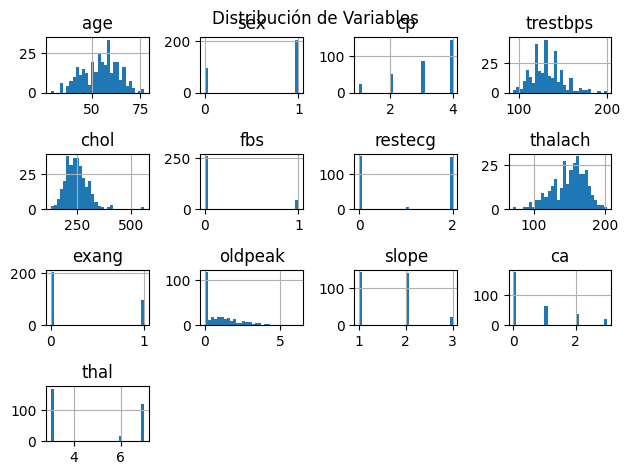


Número de outliers detectados: 87

Resultados de Experimentación con DBSCAN:
   eps  min_samples  n_clusters  n_outliers silhouette_score
0  0.3            3           0         303             None
1  0.3            5           0         303             None
2  0.3            7           0         303             None
3  0.5            3           0         303             None
4  0.5            5           0         303             None
5  0.5            7           0         303             None
6  0.7            3           0         303             None
7  0.7            5           0         303             None
8  0.7            7           0         303             None


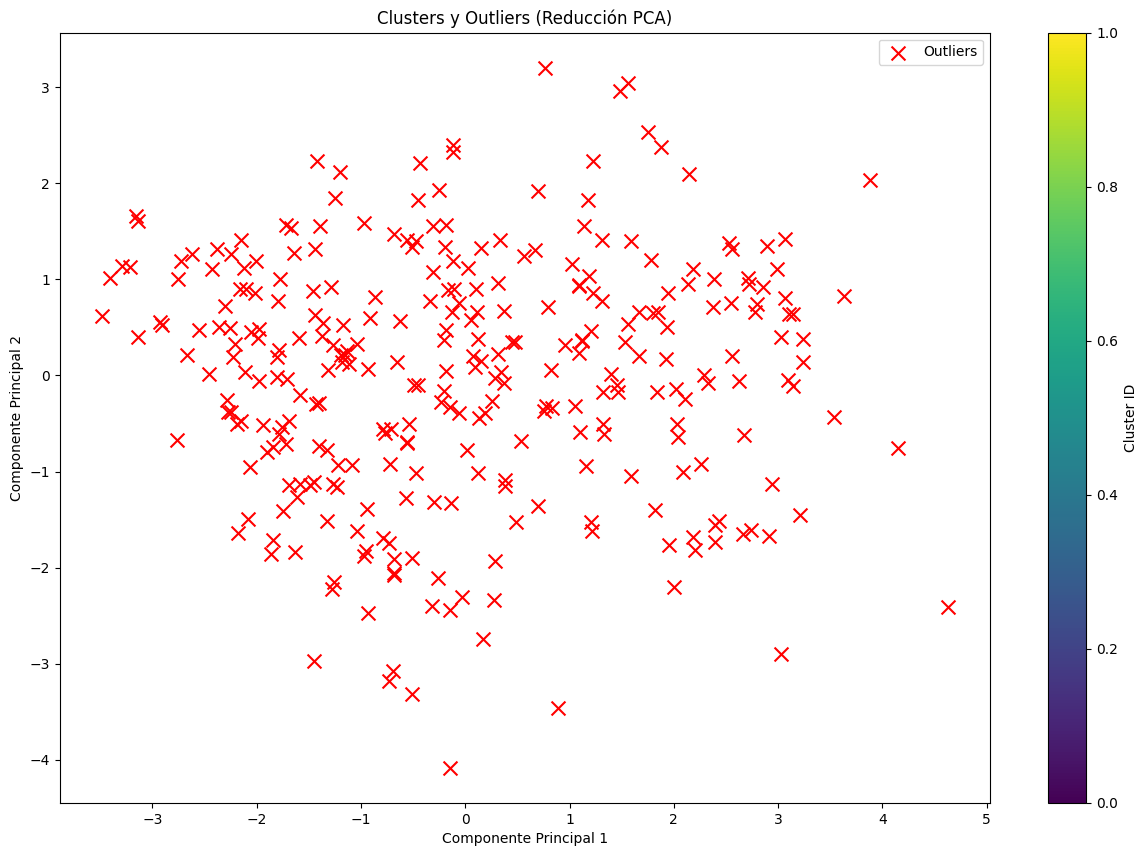


Estadísticas por Cluster:
               age       sex        cp    trestbps        chol       fbs  \
Cluster                                                                    
-1       54.438944  0.679868  3.158416  131.689769  246.693069  0.148515   

          restecg     thalach     exang   oldpeak    slope        ca      thal  
Cluster                                                                         
-1       0.990099  149.607261  0.326733  1.039604  1.60066  0.672241  4.734219  

Porcentaje de Outliers: 100.00%


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from ucimlrepo import fetch_ucirepo

# 1. Carga de datos
heart_disease = fetch_ucirepo(id=45)

# Convertir datos a DataFrame
X = pd.DataFrame(heart_disease.data.features,
                 columns=heart_disease.data.feature_names)
y = pd.DataFrame(heart_disease.data.targets,
                 columns=heart_disease.data.target_names)

# 2. Exploración y Preprocesamiento de Datos
def explorar_datos(X):
    """Función para exploración de datos"""
    print("Resumen Estadístico:")
    print(X.describe())

    print("\nInformación de Columnas:")
    print(X.info())

    # Visualización de distribución de variables
    plt.figure(figsize=(15, 10))
    X.hist(bins=30)
    plt.tight_layout()
    plt.suptitle('Distribución de Variables')
    plt.show()

# Imprimir exploración inicial
explorar_datos(X)

# Preprocesamiento
def preprocesar_datos(X):
    """Preprocesamiento de datos para DBSCAN"""
    # Eliminar columnas no numéricas si las hay
    X_numeric = X.select_dtypes(include=[np.number])

    # Imputar valores faltantes con la media
    imputer = SimpleImputer(strategy='mean') 
    X_numeric = pd.DataFrame(imputer.fit_transform(X_numeric),
                             columns=X_numeric.columns) 

    # Detección de outliers con IQR
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((X_numeric < (Q1 - 1.5 * IQR)) |
                (X_numeric > (Q3 + 1.5 * IQR))).any(axis=1)

    print(f"\nNúmero de outliers detectados: {outliers.sum()}")

    # Estandarización de datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numeric)

    return X_scaled, X_numeric

# Preprocesar datos
X_scaled, X_original = preprocesar_datos(X)

# 3. Aplicación de DBSCAN
def aplicar_dbscan(X_scaled, eps_range=[0.3, 0.5, 0.7],
                   min_samples_range=[3, 5, 7]):
    """Experimentar con diferentes parámetros de DBSCAN"""
    resultados = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X_scaled)

            # Número de clusters y outliers
            n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
            n_outliers = list(clusters).count(-1)

            # Calcular silhouette score (excluyendo outliers)
            if n_clusters > 1:
                mask = clusters != -1
                score = silhouette_score(X_scaled[mask],
                                         clusters[mask])
            else:
                score = None

            resultados.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'n_outliers': n_outliers,
                'silhouette_score': score
            })

    # Convertir a DataFrame para fácil visualización
    return pd.DataFrame(resultados)

# Ejecutar experimento de parámetros
parametros_dbscan = aplicar_dbscan(X_scaled)
print("\nResultados de Experimentación con DBSCAN:")
print(parametros_dbscan)

# Selección de mejores parámetros (ejemplo)
mejor_eps = 0.5
mejor_min_samples = 5

# Aplicar DBSCAN con mejores parámetros
dbscan = DBSCAN(eps=mejor_eps, min_samples=mejor_min_samples)
clusters = dbscan.fit_predict(X_scaled)

# 4. Visualización de Clusters
def visualizar_clusters(X_scaled, clusters, X_original):
    """Visualización de clusters y outliers"""
    plt.figure(figsize=(15, 10))

    # Reducción de dimensionalidad con PCA para visualización
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Plotear clusters
    plt.scatter(X_pca[clusters != -1, 0],
                X_pca[clusters != -1, 1],
                c=clusters[clusters != -1],
                cmap='viridis')

    # Plotear outliers
    outliers = clusters == -1
    plt.scatter(X_pca[outliers, 0],
                X_pca[outliers, 1],
                c='red',
                marker='x',
                s=100,
                label='Outliers')

    plt.title('Clusters y Outliers (Reducción PCA)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.colorbar(label='Cluster ID')
    plt.show()

visualizar_clusters(X_scaled, clusters, X_original)

# 5. Análisis de Resultados
def analisis_resultados(X_original, clusters):
    """Análisis detallado de clusters y outliers"""
    # Añadir columna de clusters al DataFrame original
    X_con_clusters = X_original.copy()
    X_con_clusters['Cluster'] = clusters

    # Estadísticas por cluster
    print("\nEstadísticas por Cluster:")
    print(X_con_clusters.groupby('Cluster').mean())

    # Distribución de outliers
    n_outliers = list(clusters).count(-1)
    print(f"\nPorcentaje de Outliers: {n_outliers/len(clusters)*100:.2f}%")

analisis_resultados(X_original, clusters)

# **Explicación de los Valores de Epsilon y Min_samples Elegidos:**
**Epsilon (ε):** Epsilon define la distancia máxima entre dos puntos para que uno sea considerado vecino del otro. En el contexto del dataset de enfermedades cardíacas del UCI, supongamos que utilizamos el gráfico de k-distancia (gráfico del codo) para determinar el valor adecuado de epsilon. Digamos que encontramos que un epsilon de 0.6 es apropiado porque es el punto donde la curva empieza a aplanarse, indicando que esa distancia es suficiente para formar clusters significativos sin incluir demasiados puntos dispersos.

**Min_samples:** Min_samples es el número mínimo de puntos requeridos para formar un cluster. Una regla común es usar dos veces la cantidad de dimensiones del dataset. En este caso, el dataset original tiene 13 dimensiones, pero si reducimos a 2 dimensiones mediante PCA, podríamos usar un min_samples de 4. Este valor asegura que los clusters formados son suficientemente densos y representativos.

# **Justificación de los Valores Elegidos:**

* **Epsilon (0.6):**

Permite identificar áreas densas de puntos sin ser tan restrictivo como para excluir posibles puntos relevantes.

Adecuado para detectar clusters en datos con una variabilidad significativa en distancias.

* **Min_samples (4):**

Asegura que los clusters están formados por un número suficiente de puntos, evitando clusters de tamaño insuficiente.

Ayuda a manejar la densidad del dataset tras la reducción dimensional.

# **Evaluación de los Clusters Formados:**
* **Identificación de Patrones de Riesgo:** Los clusters formados podrían representar diferentes perfiles de riesgo de enfermedades cardíacas, permitiendo identificar grupos con características similares.

* **Personalización de Tratamientos:** Los resultados del clustering pueden ayudar a personalizar los tratamientos y estrategias preventivas según los perfiles de los pacientes.

* **Detección de Outliers:** La capacidad de identificar outliers puede ser crucial para detectar casos inusuales que requieren atención médica especial.

# **Conclusión:**

**Objetivo Principal:** El uso de DBSCAN con los valores adecuados de epsilon y min_samples ha permitido encontrar agrupamientos significativos en los datos de enfermedades cardíacas, facilitando la identificación de patrones importantes y la detección de outliers.

**Detección de Outliers:** Los outliers identificados pueden proporcionar información valiosa sobre casos atípicos que necesitan una atención más detallada.

**Ajuste de Parámetros:** La habilidad para ajustar parámetros como epsilon y min_samples es fundamental para adaptar el análisis a diferentes tipos de datos y densidades de clusters.